### Imports

In [40]:
#!pip install pillow

In [4]:
import os
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import re
#import DataCollector-code.py
from DataCollectorFunctions import *
import datetime

### Set search terms 

In [ ]:
#search terms are a comma separated string
searchterms='old man,athlete,hero,musician'

### Get Images from search 

In [9]:
#Set filename and number of images desired 
json_name = "img_set" + datetime.datetime.now().strftime("%Y_%m_%d__%H_%M_%S") + ".json"
num_imgs_per_label = 10

In [ ]:
#Each search term creates a folder with the name of the search term containing the images retrieved 
get_responses(searchterms, num_imgs_per_label, json_name) 

### Function Defintions

In [132]:
def get_img_dict(words, path_to_words, compress=True, compress_dim=300, complexity_dim=50):
    img_dict, img_array_dict, img_array_complexity_dict = {}, {}, {}
    fmts = ['.png', '.bmp', '.jpg', '.jpeg']
    for word in words:
        img, img_array, img_array_complexity = [], [], []

        folder = os.path.join(path_to_words, word)
        pics = [name for name in os.listdir(folder) if os.path.isfile(os.path.join(folder, name))]
        pics = [p for p in pics if any([re.search(fmt, p) for fmt in fmts])]
        for pic in pics:
            img_raw = PIL.Image.open(os.path.join(path_to_words,word,pic))
            if compress == True:
                img_compress = img_raw.resize((compress_dim,compress_dim))#,Image.ANTIALIAS)
                img.append(img_compress)
                img_array.append(np.array(img_compress))
            else:
                img.append(img_raw)
                img_array.append(np.array(img_raw))
            
            img_compress_complexity = img_raw.resize((complexity_dim,complexity_dim))#,Image.ANTIALIAS)
            img_array_complexity.append(np.array(img_compress_complexity))

            img_dict[word] = img
            img_array_dict[word] = img_array
            img_array_complexity_dict[word] = img_array_complexity
                
    return img_dict, img_array_dict, img_array_complexity_dict

In [133]:
def get_rgb_distributions(img_dict):
    rgb_dict = {}
    for key in img_dict:
        rgb = []
        for i in range(len(img_dict[key])):
            r = np.sum(np.ravel(img_dict[key][i][:,:,0]))
            g = np.sum(np.ravel(img_dict[key][i][:,:,1]))
            b = np.sum(np.ravel(img_dict[key][i][:,:,2]))
            tot = 1.*r+g+b
            rgb.append([r/tot,g/tot,b/tot])
        rgb_dict[key] = rgb
    return rgb_dict

In [134]:
# duplicate
def compress_img_array(words, img_array_dict, compress_dim=300):
    for word in words:
        compressed_img_array = np.zeros((compress_dim,compress_dim,3))
        for n in range(len(img_array_dict[word])):
            for i in range(compress_dim):
                for j in range(compress_dim):
                    compressed_img_array[i][j] += img_array_dict[word][n][i][j]/(1.*len(img_array_dict[word]))
    return compressed_img_array

In [135]:
def cross_entropy(rgb_dict):
    entropy_dict = {}
    for key in rgb_dict:
        entropy_array = []
        for i in range(len(rgb_dict[key])):
            for j in range(len(rgb_dict[key])):
                entropy_array.append(scipy.stats.entropy(rgb_dict[key][i],rgb_dict[key][j]))
        entropy_dict[key] = entropy_array
    return entropy_dict

### Analysis

In [136]:
path_to_words = 'C:\\Users\\Doug\\Desktop\\CSSS_projects\\comp-syn\\images\\'
words = ['bunny']

In [15]:
img_dict, img_array_dict, img_array_complexity_dict = get_img_dict(words, path_to_words)
rgb_dict = get_rgb_distributions(img_array_dict)
rgb_dict_complexity = get_rgb_distributions(img_array_complexity_dict)
entropy_dict = cross_entropy(rgb_dict)
complexity_dict = cross_entropy(rgb_dict_complexity)
compressed_img_array = compress_img_array(words, img_array_dict)

AttributeError: type object 'Image' has no attribute 'open'

### Visualization

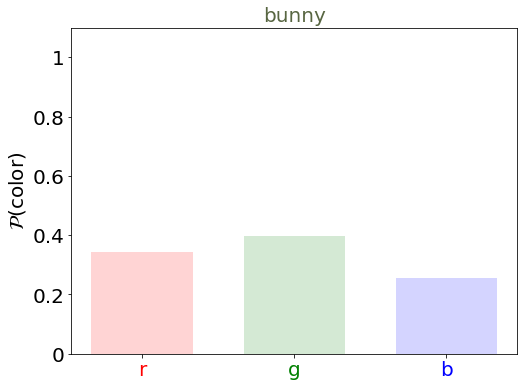

In [16]:
f,ax = plt.subplots(1,1,figsize=(8,6))

alpha = 0.17
N = 3

avg_rgb = np.mean(np.array(rgb_dict['bunny']),axis=0)

ind = np.linspace(0,3,N) #the x locations for the groups
width = 1. #the width of the bars

p1 = ax.bar(ind, avg_rgb, width, 
            color=('r','g','b'),alpha=alpha)

ax.set_ylim(0,1.1)
ax.set_title('{}'.format(words[1]), fontsize=20,color=(np.mean(np.array(rgb_dict['bunny']),axis=0)))
ax.set_xticks(ind)
ax.set_xticklabels(('r', 'g', 'b'), fontsize=20)
ax.set_yticks((0,0.2,0.4,0.6,0.8,1.0))
ax.set_yticklabels(('0', '0.2', '0.4', '0.6', '0.8', '1'), fontsize=20)

[t.set_color(i) for (i,t) in
 zip(['r','g','b'],ax.xaxis.get_ticklabels())]

plt.ylabel(r'$\mathcal{P}(\rm{color})$',fontsize=20)
plt.subplots_adjust(wspace=0.25)
plt.show()

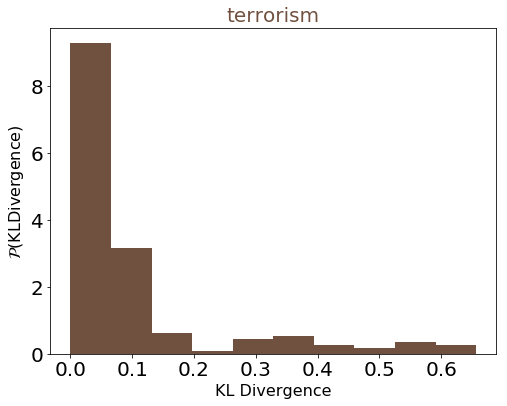

In [73]:
plt.figure(figsize=(8,6))

plt.hist(entropy_dict['terrorism'],normed=True,color=(np.mean(np.array(rgb_dict['terrorism']),axis=0)))
#plt.hist(complexity_dict['terrorism'],normed=True,color=(np.mean(np.array(rgb_dict['terrorism']),axis=0)),alpha=0.5)

plt.title('{}'.format(words[0]), fontsize=20,color=(np.mean(np.array(rgb_dict['terrorism']),axis=0)))
plt.xlabel('KL Divergence', fontsize=16)
plt.ylabel(r'$\mathcal{P}(\rm{KL Divergence})$', fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

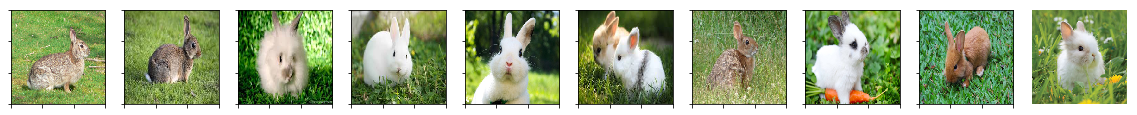

In [26]:
f, ax = plt.subplots(1,10,sharex='col',sharey='none',figsize=(20,20)) #2 rows x 2 columns

for i in range(0,len(img_dict['bunny'])):
    ax[i].imshow(img_dict['bunny'][i])
    ax[i].tick_params(labelbottom='off')
    ax[i].tick_params(labelleft='off')

plt.axis('off')
plt.savefig('bunny.jpg')
plt.show()

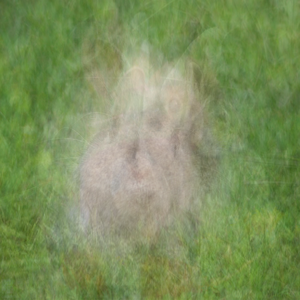

In [25]:
Image.fromarray(compressed_img_array.astype(np.uint8))